<a href="https://colab.research.google.com/github/gloriapreet/ticket_assignment/blob/master/ticket_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement: ###

Most of the IT organizations levarages incident management process to address any unplanned interruptions to the services which affects business and its users.

The incidents are generally created by various stakeholders like end users, vendors, IT users, etc. They might not have right information as to which team the ticket should go to. Hence, to imporve and retain customer satisfaction, it is very important that the ticket is assigned to the right group of people for faster and approproiate resolution. In Many Organizations this is still a manual process. There re few problems with the manual process:

Manual assignment of incidents is time consuming
It requires human efforts
There may bemistakes due to human errors and resource consumption is carried out ineffectively because ofthe misaddressing
Manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service

### Solution we are providing: ###

We are here building an AI Enabled system which will classify the incidents to the right functional group. Guided by AI, organizations can reduce the resolution time and focus on more productive tasks. This will overcome or save time with below losses that occur due to manual process where :

 - ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment
 - 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams
- Around ~25% of Incidents are wrongly assigned to functional teams.Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.

In [ ]:
# install packages
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install nltk

# import pandas
import pandas as pd
from pandas.core.common import flatten
# import matplot for plotting
import matplotlib.pyplot as plt

# import nltk which is a toolkit for natural language processing 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize

# import numpy
import numpy as np

# import regex utilities
import re

# read from ticket_assigments.csv
df = pd.read_csv("https://raw.githubusercontent.com/gloriapreet/ticket_assignment/master/data/ticket_assignments.csv")
# have a look at the data
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


### Show data types for all columns ###
#### DataType object means string ####

In [ ]:

df.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

### Column data types ###

In [ ]:
df.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

### Look at how many values are missing ###

In [ ]:

df.isnull().sum()

Short description    2
Description          1
Caller               0
Assignment group     0
dtype: int64

### look at the rows with missing values ###

In [35]:
df[df.isnull().any(axis=1)]


,Short description,Description,Caller,Assignment group


### Count by incidents by Assignment group ###
#### show all rows ####

In [ ]:

pd.set_option('display.max_rows', None)
groupby_df = df.groupby('Assignment group', sort=False).size().reset_index(name='count')
total=sum(groupby_df['count'])
groupby_df['%'] = (groupby_df['count'] * 100 / total).round(2)
groupby_df

,Assignment group,count,%
0,GRP_0,3974,46.77
1,GRP_1,31,0.36
2,GRP_3,200,2.35
3,GRP_4,100,1.18
4,GRP_5,129,1.52
5,GRP_6,184,2.17
6,GRP_7,68,0.80
7,GRP_8,661,7.78
8,GRP_9,252,2.97
9,GRP_10,140,1.65


In [ ]:
pd.set_option('display.max_rows', None)
groupby_df = df.groupby('Assignment group', sort=False).size().reset_index(name='count')
total=sum(groupby_df['count'])
groupby_df['%'] = (groupby_df['count'] * 100 / total).round(2)
groupby_df

,Assignment group,count,%
0,GRP_0,3976,46.78
1,GRP_1,31,0.36
2,GRP_3,200,2.35
3,GRP_4,100,1.18
4,GRP_5,129,1.52
5,GRP_6,184,2.16
6,GRP_7,68,0.80
7,GRP_8,661,7.78
8,GRP_9,252,2.96
9,GRP_10,140,1.65


### Drop rows with missing values in any columns ###

In [ ]:
df = df.dropna()

### The data frame should now have no missing values ###

In [ ]:
df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

### Visualization, plot number of incidents for each group ###

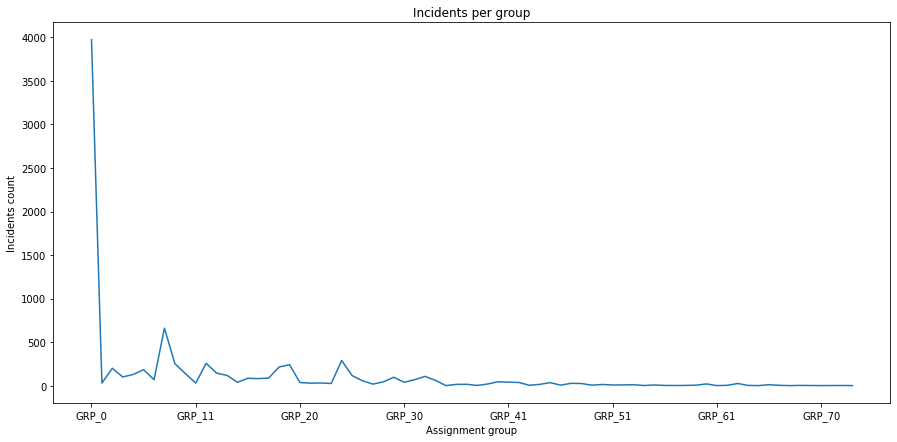

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('Assignment group')
ax.set_ylabel('Incidents count')
ax.set_title('Incidents per group');
df.groupby('Assignment group', sort=False).size().plot(ax=ax)

### Preprocessing and token creation ###

In [ ]:
# function to stip text

def preprocess(texts):
    preprocessed_texts = []
    for text in (texts):
        text = str(text)
        new_text = re.sub(r'[\r\n<>_]', '', text) # remove carriage return and special characters
        new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
        new_text = re.sub(r'\d+','',new_text)# remove numbers
        new_text = new_text.lower() # lower case, .upper() for upper          
        if new_text != '':
            preprocessed_texts .append(new_text)
    return preprocessed_texts

# function to tokenize words

def tokenize_words(texts):
    words = []
    for text in texts:
        tokens = word_tokenize(text)
        if tokens != '':
            words.append(tokens)
    return list(flatten(words))

short_description_texts = df['Short description'].to_numpy()
description_texts = df['Description'].to_numpy()
texts = np.concatenate((short_description_texts, description_texts))

tokenize_words(preprocess(texts))



['login',
 'issue',
 'outlook',
 'cant',
 'log',
 'in',
 'to',
 'vpn',
 'unable',
 'to',
 'access',
 'hrtool',
 'page',
 'skype',
 'error',
 'unable',
 'to',
 'log',
 'in',
 'to',
 'engineering',
 'tool',
 'and',
 'skype',
 'event',
 'criticalhostnamecompanycom',
 'the',
 'value',
 'of',
 'mountpoint',
 'threshold',
 'for',
 'oraclesiderpdata',
 'ticketno',
 'employment',
 'status',
 'new',
 'nonemployee',
 'enter',
 'users',
 'name',
 'unable',
 'to',
 'disable',
 'add',
 'ins',
 'on',
 'outlook',
 'ticket',
 'update',
 'on',
 'inplant',
 'engineering',
 'tool',
 'says',
 'not',
 'connected',
 'and',
 'unable',
 'to',
 'submit',
 'reports',
 'hrtool',
 'site',
 'not',
 'loading',
 'page',
 'correctly',
 'unable',
 'to',
 'login',
 'to',
 'hrtool',
 'to',
 'sgxqsuojr',
 'xwbesorf',
 'cards',
 'user',
 'wants',
 'to',
 'reset',
 'the',
 'password',
 'unable',
 'to',
 'open',
 'payslips',
 'ticket',
 'update',
 'on',
 'inplant',
 'unable',
 'to',
 'login',
 'to',
 'company',
 'vpn',
 'wh